### 许多机器学习问题涉及训练实例的几千甚至百万个特征，导致训练非常缓慢。这称为“维度的诅咒”。

比如，一个学生的照片有几百万像素，每个像素的颜色都是一个特征...

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1575288098133&di=3d461603899a15420454e6eb9eec2157&imgtype=0&src=http%3A%2F%2Fimg.jpjww.com%2Fimg%2F5b81169b3b9751fd.jpg)

### 事实上，很多问题我们都可以大量减少特征的数量，将棘手的问题转化成容易解决。

例如。人照片图像边框的像素几乎全部没有用处。完全可以在训练中抛弃这些像素，也不会丢失太多信息。

此外，相邻两个像素通常是高度相关的；如果将它们合并成一个像素（例如，取强度的平均值），也不会丢失太多信息。

![](https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=2546970417,687493825&fm=26&gp=0.jpg)

除了**加快训练**，降维对于**数据可视化**也是非常有用的。

将维度降到两个、三个，就可绘制出高维训练集，通过视觉来检查模式，获得一些重要的洞察。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1575288466573&di=774ba5cc01d2d6c35b9a841d04be9e84&imgtype=0&src=http%3A%2F%2Faliyunzixunbucket.oss-cn-beijing.aliyuncs.com%2Fjpg%2Fde276f2b7a468030d79b63b76a5989f0.jpg%3Fx-oss-process%3Dimage%2Fresize%2Cp_100%2Fauto-orient%2C1%2Fquality%2Cq_90%2Fformat%2Cjpg%2Fwatermark%2Cimage_eXVuY2VzaGk%3D%2Ct_100)

# 1. PCA (Principal Component Analysis, 主成分分析）

### 本文主要参考 Jake VanderPlas 的教程：
        https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 我们观察下面的2维数据。

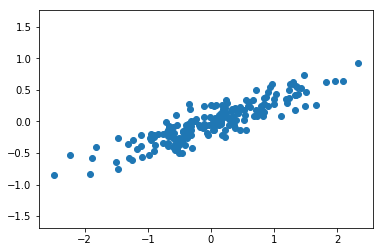

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

### 该数据明显有两个“主轴”（称为“成分”）。使用 PCA 我们分解得到两个 compoents 

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

print('components:\n\t', pca.components_)

components:
	 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


### 图像化 PCA 的两个成分

注意其中一个矢量的长度远远长过另外一个。

某种程度上，这意味着数据在这个方向上的分布比另一个方向“更重要”。

数学上表现为“绝大部分方差由这个维度贡献”，用**方差解释率(explained variance ratio)**描述。

explained_variance:
	 [0.97634101 0.02365899]


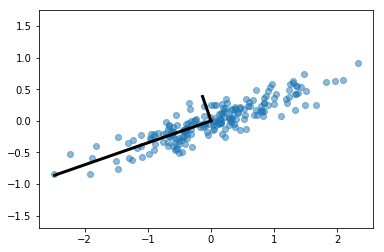

In [4]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

print('explained_variance:\n\t', pca.explained_variance_ratio_)

### PCA 降维


##### 拟合 X 数据

0.95 要求“保留95%方差”

In [5]:
model = PCA(0.95)
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### 查看降维后的结果（只剩1个维度了）

In [6]:
print (model.transform(X))

[[ 6.76769235e-01]
 [-1.07121393e+00]
 [ 7.27912364e-01]
 [ 2.30964136e+00]
 [ 6.30052323e-01]
 [ 1.02448887e+00]
 [ 7.77183507e-01]
 [-1.39656414e+00]
 [-2.91049874e-01]
 [ 1.88864221e+00]
 [-7.11544293e-01]
 [ 6.38884130e-01]
 [ 5.48059617e-01]
 [-2.19312436e-01]
 [-3.87789490e-01]
 [ 7.15219956e-01]
 [-1.08373816e+00]
 [-2.99917403e-01]
 [-7.96849021e-01]
 [-8.12568346e-01]
 [-1.54018281e+00]
 [-2.52920476e-01]
 [ 6.26464454e-01]
 [-1.61007571e+00]
 [ 5.04240563e-01]
 [ 5.53935753e-01]
 [ 6.81911252e-01]
 [-2.00157228e-02]
 [ 1.13550833e-01]
 [ 2.92286085e-02]
 [-2.14393483e-01]
 [-1.03406124e+00]
 [ 3.88635004e-01]
 [ 9.96727811e-01]
 [ 1.39223653e+00]
 [ 4.57043694e-01]
 [ 6.81839901e-01]
 [-9.05233246e-01]
 [ 4.94316334e-01]
 [ 6.22411280e-01]
 [ 3.26088548e-01]
 [ 4.52560386e-01]
 [ 6.81840663e-01]
 [-2.44832816e-01]
 [-5.27149562e-01]
 [-4.51448737e-01]
 [-1.42864453e+00]
 [ 8.05233004e-01]
 [ 1.81049742e-01]
 [ 3.49039347e-01]
 [ 2.65803583e+00]
 [-1.34272221e+00]
 [-1.7302634

##### 在原X数据的特征下，重现降维后的结果

PCA对数据进行了压缩：舍掉次轴，投影到主轴，数据量减少了50%。

PCA 的降维本质上是从高维空间向低维投影。


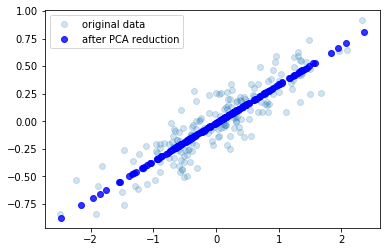

In [7]:
### inverse_transform，转回原来的特征
X_new = model.inverse_transform(model.transform(X))

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2, label='original data')
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8, label='after PCA reduction')
plt.legend()

### 总结 PCA 原理

将n维特征映射到 k 个全新的正交特征上（称为主成分）。

工作方式为：从原始的空间中顺序地找一组相互正交的坐标轴；

    第一个坐标轴是原始数据中方差最大的方向；

    第二个坐标轴是与第一个坐标轴正交的平面中，使得方差最大的；

    第三个轴是与第1,2个轴正交的平面中方差最大的；...

    最终，大部分方差都包含在前面k个坐标轴中，后面的坐标轴所含的方差几乎为0。

    是故，忽略余下的坐标轴，只保留前面k个含有绝大部分方差的坐标轴。


### PCA 应用到 Digits

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

##### 投影到 2 维空间

In [9]:
model = PCA(2)  # project from 64 to 2 dimensions
model.fit(X)
Xproj = model.transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


##### 压缩后的 2 维特征空间仍能看出数字 0 1 2 ... 9  的区别

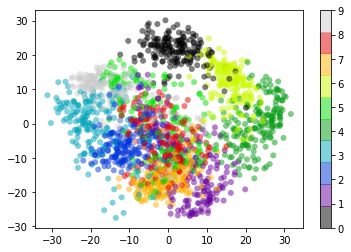

In [10]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

##### 查看压缩造成的信息损失

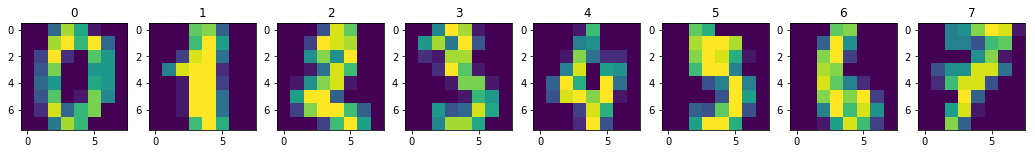

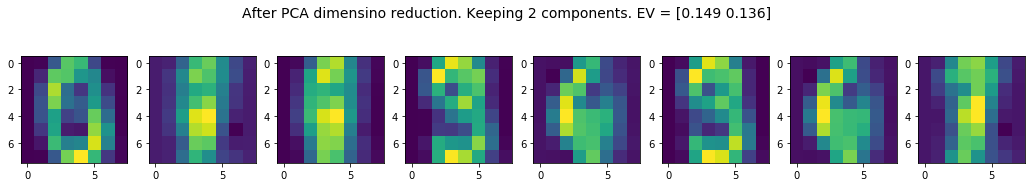

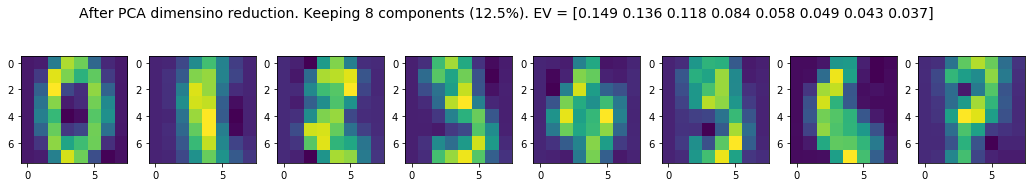

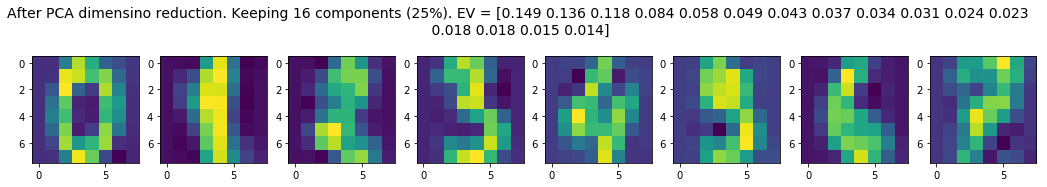

In [11]:
### 初始化要画的图
fig, axs = plt.subplots(1, 8, figsize=(18,3))
fig1, axs1 = plt.subplots(1, 8, figsize=(18,3))
fig2, axs2 = plt.subplots(1, 8, figsize=(18,3))
fig3, axs3 = plt.subplots(1, 8, figsize=(18,3))

### 训练三个PCA压缩模型
model1 = PCA(2); model1.fit(X)
model2 = PCA(8); model2.fit(X)
model3 = PCA(16); model3.fit(X)

### 可视化
for i in range(8):
    x0, y0 = X[i], y[i]
    
    axs[i].imshow(x0.reshape([8,8]), )
    axs[i].set_title(str(y0))
    
    ### 2 维压缩
    x1 = model1.inverse_transform(model1.transform([x0]))[0]
    axs1[i].imshow(x1.reshape([8,8]), )
    ### 4 维压缩
    x2 = model2.inverse_transform(model2.transform([x0]))[0]
    axs2[i].imshow(x2.reshape([8,8]), )
    ### 8 维压缩
    x3 = model3.inverse_transform(model3.transform([x0]))[0]
    axs3[i].imshow(x3.reshape([8,8]), )

fig1.suptitle('After PCA dimensino reduction. Keeping 2 components. EV = '+\
              np.array2string(model1.explained_variance_ratio_, precision=3), fontsize=14) 
fig2.suptitle('After PCA dimensino reduction. Keeping 8 components (12.5%). EV = '+\
              np.array2string(model2.explained_variance_ratio_, precision=3), fontsize=14)
fig3.suptitle('After PCA dimensino reduction. Keeping 16 components (25%). EV = '+\
              np.array2string(model3.explained_variance_ratio_, precision=3), fontsize=14)

plt.show()

#### 使用压缩后的数据进行训练与测试。

保留 8 个以上 components 基本不影响训练结果

甚至，因为降低了数据复杂性，使得某些方法表现更好。

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/softw

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

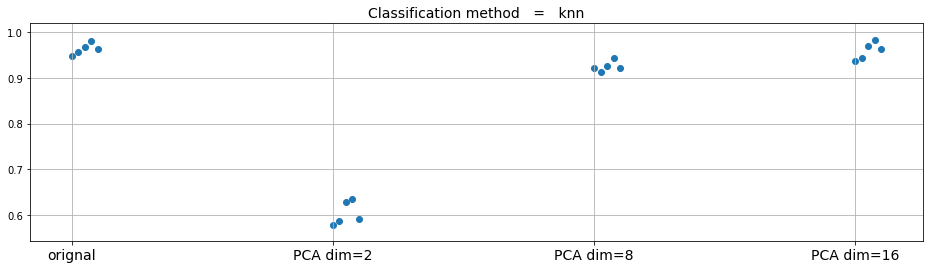

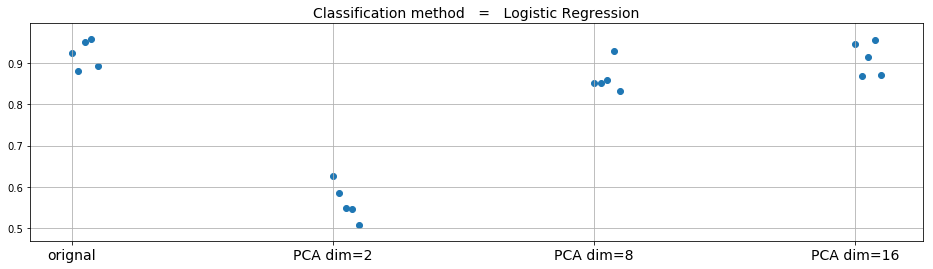

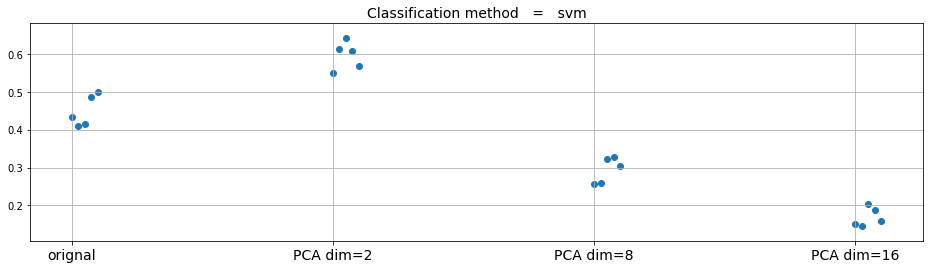

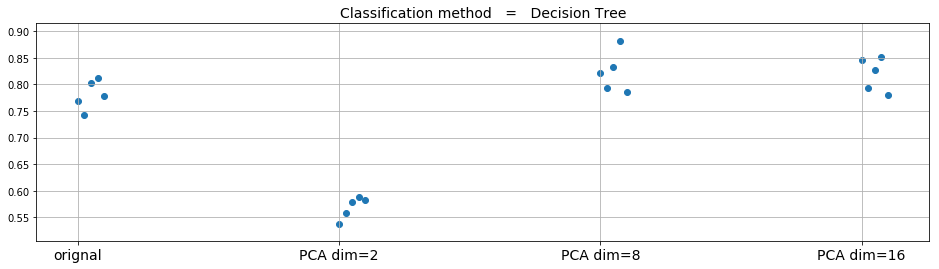

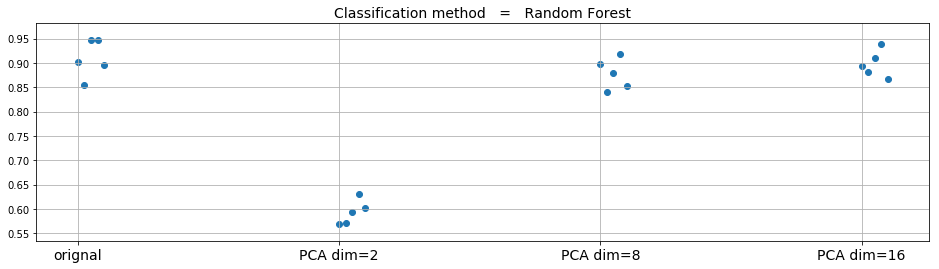

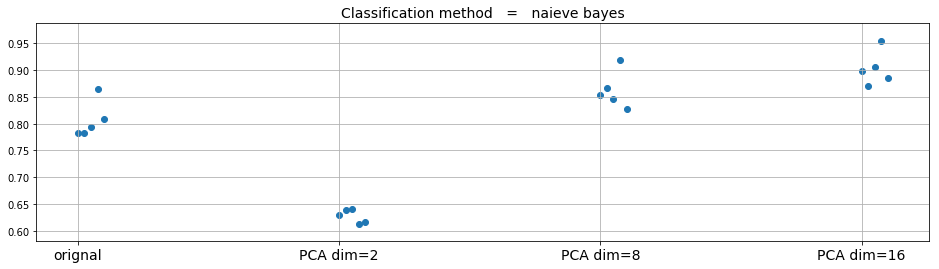

In [12]:
from sklearn import metrics, model_selection, neighbors, linear_model, svm, ensemble, naive_bayes, tree

X1, X2, X3 = model1.transform(X), model2.transform(X), model3.transform(X)

for model, text in [
    [neighbors.KNeighborsClassifier(), 'knn'],
    [linear_model.LogisticRegression(), 'Logistic Regression'],
    [svm.SVC(), 'svm'],
    [tree.DecisionTreeClassifier(), 'Decision Tree'],
    [ensemble.RandomForestClassifier(), 'Random Forest'],
    [naive_bayes.GaussianNB(), 'naieve bayes'],
    ]:
    fig, ax = plt.subplots(figsize=(16,4))
    
    rlt = model_selection.cross_val_score(model, X, y, cv=5 )
    rlt1 = model_selection.cross_val_score(model, X1, y, cv=5 )
    rlt2 = model_selection.cross_val_score(model, X2, y, cv=5 )
    rlt3 = model_selection.cross_val_score(model, X3, y, cv=5 )
    
    xs = np.row_stack([np.linspace(0,0.1,5),np.linspace(1,1.1,5),
                          np.linspace(2,2.1,5),np.linspace(3,3.1,5)]).reshape(-1)
    ys = np.row_stack([rlt, rlt1, rlt2, rlt3]).reshape(-1)
    
    ax.scatter(xs,ys)
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(['orignal', 'PCA dim=2', 'PCA dim=8', 'PCA dim=16'], fontsize=14)
    ax.grid()
    ax.set_title('Classification method   =   '+text, fontsize=14)
    #print(text, ' accuracy, orignal data:\n\t', model_selection.cross_val_score(model, X, y, cv=5 ), '\n')
    #print(text, ' accuracy, PCA dim 2:   \n\t', model_selection.cross_val_score(model, X1, y, cv=5 ), '\n')
    #print(text, ' accuracy, PCA dim 16:   \n\t', model_selection.cross_val_score(model, X2, y, cv=5 ), '\n')
    #print(text, ' accuracy, PCA dim 32:   \n\t', model_selection.cross_val_score(model, X3, y, cv=5 ), '\n')

PCA 优点：
    
    图像简单，逻辑清楚。
    
    计算速度非常快。
    
    

缺点： 

    方差贡献小部分的不一定不重要，有时这些特征可能会含有样本差异性的重要特征

    是一种 线性 的降维算法，对下图“瑞士卷“形状的数据会失效。
    
![](http://people.cs.uchicago.edu/~dinoj/manifold/swissroll.gif)

# 2. 非线性“流行学习”

流行降维可以非线性地将高维空间中的曲面映射到低维空间的平面，直观演示如下图

![](https://imgconvert.csdnimg.cn/aHR0cHM6Ly9hc2sucWNsb3VkaW1nLmNvbS9odHRwLXNhdmUveWVoZS0yNzcwMzc4L290bXNrdG5ubWUuanBlZw?x-oss-process=image/format,png)

作为代表，介绍局部线性嵌入(LLE)

## 局部线性嵌入(Locally Linear Embedding，简称LLE)

假设数据在较小的局部是线性的，也就是说，**某一个样本可以由它最近邻的几个样本线性表示**。离样本远的样本对局部的线性关系没有影响

步骤：
    1. 类似于 knn，每个样本找出 k 个近邻；
    2. 求解最优权重系数，建立样本间的线性表示关系；
    3. 求解低维空间映射的结果，尽可能保持步骤 2 中的线性关系。
    
![](https://image.slidesharecdn.com/thompsondimensionalityreduction-110404033648-phpapp02/95/manifold-learning-with-application-to-object-recognition-24-728.jpg?cb=1301888269)

LLE 只考虑 k 个近邻的相互关系，大大减少了计算量。

传统的 **等距映射（ISOMAP）** 寻找所有样本全局的最优解，当数据量大、样本维度高时，计算非常昂贵。

![](https://cn.bing.com/th?id=OIP.d8LeTq5NuYw--crXz_b0dgHaDx&pid=Api&rs=1)

##### 生成一个瑞士卷以供测试

![](https://cn.bing.com/th?id=OIP.QuJE141-68J8v1w4Kxhn1gHaE8&pid=Api&rs=1)

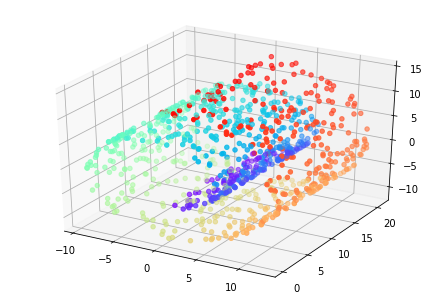

In [13]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

X, t = datasets.make_swiss_roll(n_samples=1000, random_state=30, )

fig = plt.figure()
ax = Axes3D(fig,)
ax.scatter(X[:,0],X[:,1],X[:,2], c=t, cmap=plt.cm.rainbow)

##### 使用 LLE 转换数据到低维

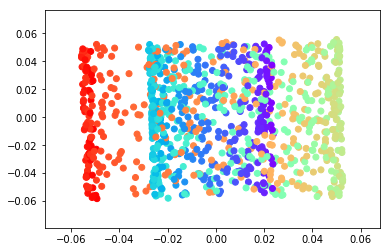

In [14]:
from sklearn import manifold

model = manifold.LocallyLinearEmbedding(n_neighbors=100, n_components=2)
X_new = model.fit_transform(X)
    
fig, ax = plt.subplots()
ax.scatter(X_new[:,0], X_new[:,1], c=t, cmap = plt.cm.rainbow)

##### 测试 n_neighbors 的影响：邻居越多，结果越具备“整体”特性

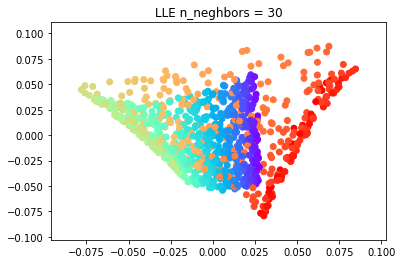

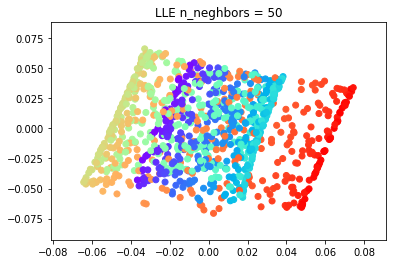

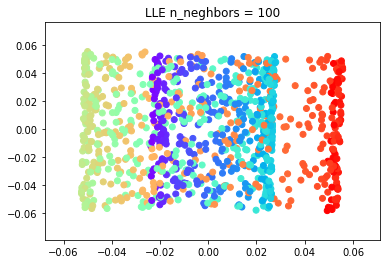

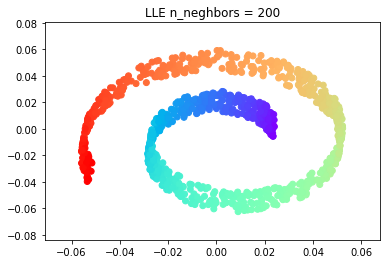

In [15]:
for n_neighbors in [ 30, 50, 100, 200,]:

    model = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2)
    X_new = model.fit_transform(X)
    
    fig, ax = plt.subplots()
    ax.scatter(X_new[:,0], X_new[:,1], c=t, cmap = plt.cm.rainbow)
    ax.set_title('LLE n_neghbors = '+str(n_neighbors))

LLE算法的主要缺点有：

    无法学习闭合的流形（比如球），样本集一般要稠密、均匀

    最近邻样本数的选择敏感，对最后的降维结果有很大影响。

降维的算法还有很多，比如：

    线性判别分析（LDA），一种考虑了标签的“有监督学习”的技巧，思想是“投影后类内方差最小，类间方差最大”。因此有助于机器学习...
    
![](https://cn.bing.com/th?id=OIP.fheHf3kJrNiD6dnnnys2LAHaFj&pid=Api&rs=1)
    
     t-SNE，假设高维空间中的任意两个点满足以任意一个为中心的高斯分布，依靠条件概率判定它们的相似性，在低维空间中保留这个相似性...
     
![](http://bicepjai.github.io/images/tb-gcloud/tsne_sklearn_digits.png)
        
    Laplacian Eigenmaps 拉普拉斯特征映射，与 LLE 类似也是在局部的角度构造数据之间的关系，技术上采用了图以及连线权重的方法...
    
![](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/36141/versions/2/screenshot.png)

##### 作业： 使用 LLE  将 digits 降维到 2， 8, 16 维 （使用 n_neighbors = 5 足矣），使用降维后的数据训练分类算法，评估其表现

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/xiaodongli/softw

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/xiaodongli

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

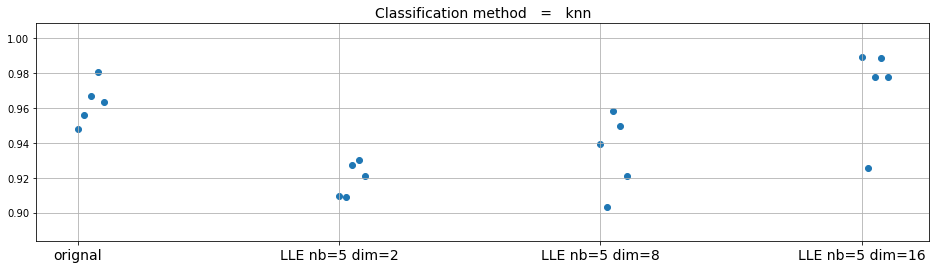

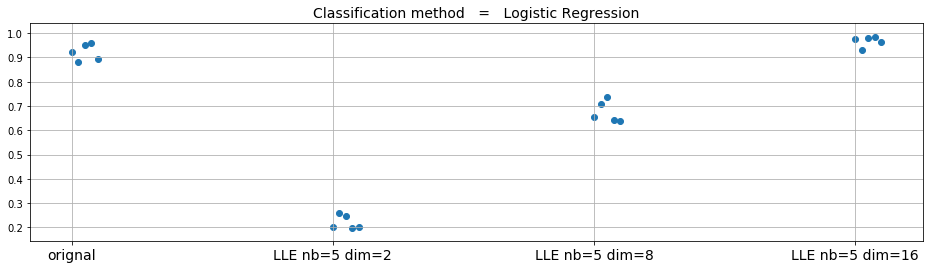

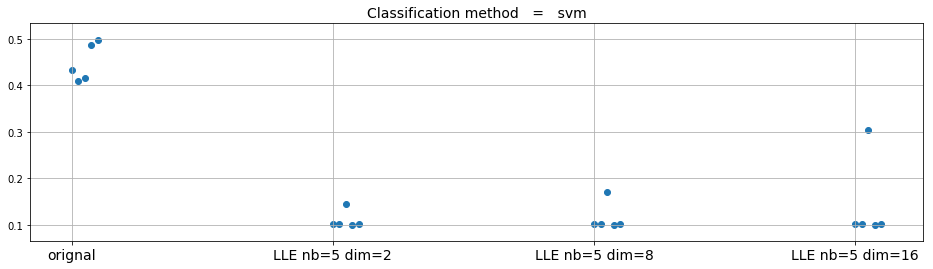

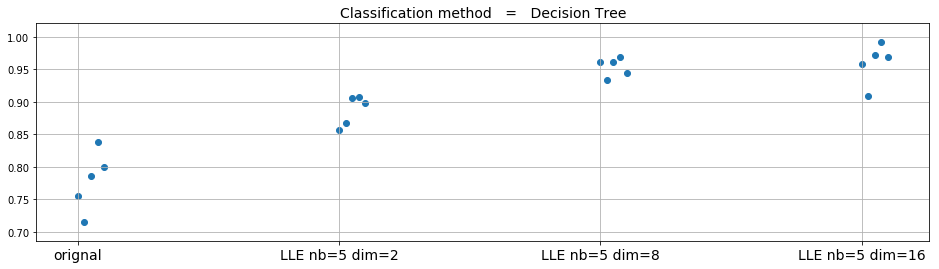

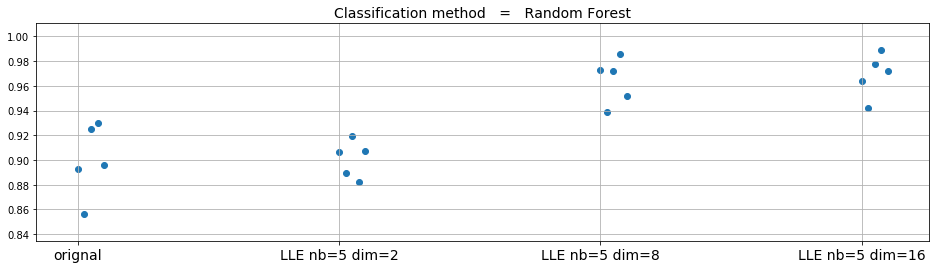

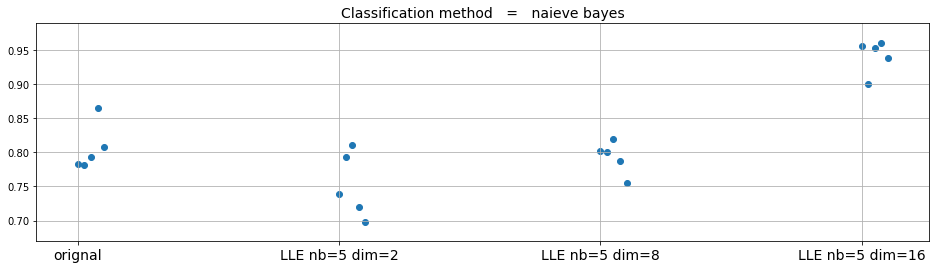

In [80]:
## 代码自己写...